In [7]:
%matplotlib inline
%load_ext memory_profiler
from sklearn.neighbors import NearestNeighbors
from sklearn.random_projection import SparseRandomProjection
from bioinf_learn.util import neighborhood_accuracy
from bioinf_learn.util import measureRandomProjection
from eden.converter.graph.gspan import gspan_to_eden
from eden.graph import Vectorizer
import time 
from sklearn.random_projection import GaussianRandomProjection
from bioinf_learn.util import plotData

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [2]:
graphs = gspan_to_eden( 'http://www.bioinf.uni-freiburg.de/~costa/bursi.gspan' )
vectorizer = Vectorizer( r=2,d=5 )
%time %memit datasetBursi = vectorizer.transform( graphs )

peak memory: 483.93 MiB, increment: 387.93 MiB
CPU times: user 22.4 s, sys: 100 ms, total: 22.5 s
Wall time: 23.5 s


In [3]:
time_list = []
accuracy_list = []

In [4]:
print "Shape: ", datasetBursi.shape
print "Approximate number of non-zero features: ", datasetBursi.nnz / float(datasetBursi.shape[0])
print "Sparsity: ", datasetBursi.nnz / float(datasetBursi.shape[0]) / datasetBursi.shape[1]

Shape:  (4337, 1048577)
Approximate number of non-zero features:  373.168549689
Sparsity:  0.000355880922134


In [5]:
data_projection = SparseRandomProjection(n_components=10000, random_state=1)
dataset_dense_10000 = data_projection.fit_transform(datasetBursi)

data_projection = SparseRandomProjection(n_components=1000, random_state=1)
dataset_dense_1000 = data_projection.fit_transform(datasetBursi)

data_projection = SparseRandomProjection(n_components=800, random_state=1)
dataset_dense_800 = data_projection.fit_transform(datasetBursi)

data_projection = SparseRandomProjection(n_components=600, random_state=1)
dataset_dense_600 = data_projection.fit_transform(datasetBursi)

data_projection = SparseRandomProjection(n_components=400, random_state=1)
dataset_dense_400 = data_projection.fit_transform(datasetBursi)

data_projection = SparseRandomProjection(n_components=100, random_state=1)
dataset_dense_100 = data_projection.fit_transform(datasetBursi)


In [7]:
print "Projeted to 10000 dimensions:\n"
print "Shape: ", dataset_dense_10000.shape
print "Approximate number of non-zero features: ", dataset_dense_10000.nnz / float(dataset_dense_10000.shape[0])
print "Sparsity: ", dataset_dense_10000.nnz / float(dataset_dense_10000.shape[0]) / dataset_dense_10000.shape[1]
print "\n"

print "Projeted to 1000 dimensions:\n"
print "Shape: ", dataset_dense_1000.shape
print "Approximate number of non-zero features: ", dataset_dense_1000.nnz / float(dataset_dense_1000.shape[0])
print "Sparsity: ", dataset_dense_1000.nnz / float(dataset_dense_1000.shape[0]) / dataset_dense_1000.shape[1]
print "\n"

print "Projeted to 800 dimensions:\n"
print "Shape: ", dataset_dense_800.shape
print "Approximate number of non-zero features: ", dataset_dense_800.nnz / float(dataset_dense_800.shape[0])
print "Sparsity: ", dataset_dense_800.nnz / float(dataset_dense_800.shape[0]) / dataset_dense_800.shape[1]
print "\n"

print "Projeted to 600 dimensions:\n"
print "Shape: ", dataset_dense_600.shape
print "Approximate number of non-zero features: ", dataset_dense_600.nnz / float(dataset_dense_600.shape[0])
print "Sparsity: ", dataset_dense_600.nnz / float(dataset_dense_600.shape[0]) / dataset_dense_600.shape[1]
print "\n"

print "Projeted to 400 dimensions:\n"
print "Shape: ", dataset_dense_400.shape
print "Approximate number of non-zero features: ", dataset_dense_400.nnz / float(dataset_dense_400.shape[0])
print "Sparsity: ", dataset_dense_400.nnz / float(dataset_dense_400.shape[0]) / dataset_dense_400.shape[1]
print "\n"

print "Projeted to 100 dimensions:\n"
print "Shape: ", dataset_dense_100.shape
print "Approximate number of non-zero features: ", dataset_dense_100.nnz / float(dataset_dense_100.shape[0])
print "Sparsity: ", dataset_dense_100.nnz / float(dataset_dense_100.shape[0]) / dataset_dense_100.shape[1]

Projeted to 10000 dimensions:

Shape:  (4337, 10000)
Approximate number of non-zero features:  2913.90246714
Sparsity:  0.291390246714


Projeted to 1000 dimensions:

Shape:  (4337, 1000)
Approximate number of non-zero features:  286.160018446
Sparsity:  0.286160018446


Projeted to 800 dimensions:

Shape:  (4337, 800)
Approximate number of non-zero features:  229.502190454
Sparsity:  0.286877738068


Projeted to 600 dimensions:

Shape:  (4337, 600)
Approximate number of non-zero features:  175.481438783
Sparsity:  0.292469064638


Projeted to 400 dimensions:

Shape:  (4337, 400)
Approximate number of non-zero features:  119.386903389
Sparsity:  0.298467258474


Projeted to 100 dimensions:

Shape:  (4337, 100)
Approximate number of non-zero features:  29.6795019599
Sparsity:  0.296795019599


In [8]:
exact = NearestNeighbors()
exact.fit(datasetBursi)
time_start = time.time()
exactNeighbors = exact.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)

In [9]:
randomProjection = NearestNeighbors()

randomProjection.fit(dataset_dense_10000)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 10000 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)

accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 10000 dimensions:  0.903020521098


In [10]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_1000)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 1000 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 1000 dimensions:  0.753792944432


In [11]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_800)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 800 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 800 dimensions:  0.731657827992


In [12]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_600)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 600 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 600 dimensions:  0.697855660595


In [13]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_400)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 400 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 400 dimensions:  0.646253170394


In [14]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_100)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 100 dimensions: ", neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 100 dimensions:  0.438044731381


7


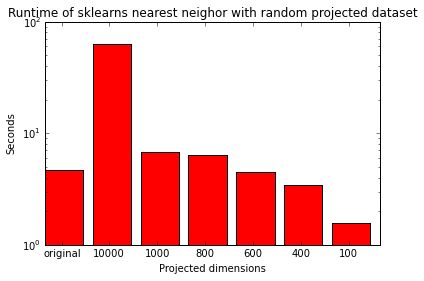

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind = np.arange(7)
print len(time_list)
plt.bar(ind, time_list, color='r')
plt.yscale('log')

plt.ylabel("Seconds")
plt.xlabel("Projected dimensions")

plt.xticks(ind+0.35, ("original", "10000","1000","800","600","400","100"))
plt.title("Runtime of sklearns nearest neighor with random projected dataset")
plt.show()
    

7


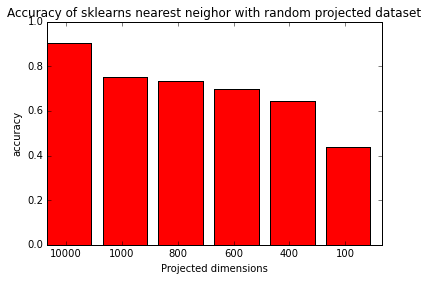

In [26]:
ind = np.arange(6)
print len(time_list)
plt.bar(ind, accuracy_list, color='r')

plt.ylabel("accuracy")
plt.xlabel("Projected dimensions")

plt.xticks(ind+0.35, ("10000","1000","800","600","400","100"))
plt.title("Accuracy of sklearns nearest neighor with random projected dataset")
plt.show()

In [27]:
print time_list

[4.720416069030762, 63.306145906448364, 6.829099893569946, 6.4139769077301025, 4.526046991348267, 3.450144052505493, 1.5602428913116455]


### random projection

In [29]:
data_projection = GaussianRandomProjection(n_components=10000, random_state=1)
dataset_dense_10000 = data_projection.fit_transform(datasetBursi)

data_projection = GaussianRandomProjection(n_components=1000, random_state=1)
dataset_dense_1000 = data_projection.fit_transform(datasetBursi)

data_projection = GaussianRandomProjection(n_components=800, random_state=1)
dataset_dense_800 = data_projection.fit_transform(datasetBursi)

data_projection = GaussianRandomProjection(n_components=600, random_state=1)
dataset_dense_600 = data_projection.fit_transform(datasetBursi)

data_projection = GaussianRandomProjection(n_components=400, random_state=1)
dataset_dense_400 = data_projection.fit_transform(datasetBursi)

data_projection = GaussianRandomProjection(n_components=100, random_state=1)
dataset_dense_100 = data_projection.fit_transform(datasetBursi)

MemoryError: 

In [ ]:
print "Projeted to 10000 dimensions:\n"
print "Shape: ", dataset_dense_10000.shape
print "Approximate number of non-zero features: ", dataset_dense_10000.nnz / float(dataset_dense_10000.shape[0])
print "Sparsity: ", dataset_dense_10000.nnz / float(dataset_dense_10000.shape[0]) / dataset_dense_10000.shape[1]
print "\n"

print "Projeted to 1000 dimensions:\n"
print "Shape: ", dataset_dense_1000.shape
print "Approximate number of non-zero features: ", dataset_dense_1000.nnz / float(dataset_dense_1000.shape[0])
print "Sparsity: ", dataset_dense_1000.nnz / float(dataset_dense_1000.shape[0]) / dataset_dense_1000.shape[1]
print "\n"

print "Projeted to 800 dimensions:\n"
print "Shape: ", dataset_dense_800.shape
print "Approximate number of non-zero features: ", dataset_dense_800.nnz / float(dataset_dense_800.shape[0])
print "Sparsity: ", dataset_dense_800.nnz / float(dataset_dense_800.shape[0]) / dataset_dense_800.shape[1]
print "\n"

print "Projeted to 600 dimensions:\n"
print "Shape: ", dataset_dense_600.shape
print "Approximate number of non-zero features: ", dataset_dense_600.nnz / float(dataset_dense_600.shape[0])
print "Sparsity: ", dataset_dense_600.nnz / float(dataset_dense_600.shape[0]) / dataset_dense_600.shape[1]
print "\n"

print "Projeted to 400 dimensions:\n"
print "Shape: ", dataset_dense_400.shape
print "Approximate number of non-zero features: ", dataset_dense_400.nnz / float(dataset_dense_400.shape[0])
print "Sparsity: ", dataset_dense_400.nnz / float(dataset_dense_400.shape[0]) / dataset_dense_400.shape[1]
print "\n"

print "Projeted to 100 dimensions:\n"
print "Shape: ", dataset_dense_100.shape
print "Approximate number of non-zero features: ", dataset_dense_100.nnz / float(dataset_dense_100.shape[0])
print "Sparsity: ", dataset_dense_100.nnz / float(dataset_dense_100.shape[0]) / dataset_dense_100.shape[1]

In [ ]:
exact = NearestNeighbors()
exact.fit(datasetBursi)
time_start = time.time()
exactNeighbors = exact.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)

In [ ]:
randomProjection = NearestNeighbors()

randomProjection.fit(dataset_dense_10000)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 10000 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)

accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_1000)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 1000 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_800)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 800 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_600)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 600 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_400)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 400 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_100)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 100 dimensions: ", neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind = np.arange(7)
print len(time_list)
plt.bar(ind, time_list, color='r')
plt.yscale('log')

plt.ylabel("Seconds")
plt.xlabel("Projected dimensions")

plt.xticks(ind+0.35, ("original", "10000","1000","800","600","400","100"))
plt.title("Runtime of sklearns nearest neighor with random projected dataset")
plt.show()
    

In [ ]:
ind = np.arange(6)
print len(time_list)
plt.bar(ind, accuracy_list, color='r')

plt.ylabel("accuracy")
plt.xlabel("Projected dimensions")

plt.xticks(ind+0.35, ("10000","1000","800","600","400","100"))
plt.title("Accuracy of sklearns nearest neighor with random projected dataset")
plt.show()

In [3]:
from bioinf_learn.util import measureRandomProjection
max_bin_size = 49
shingle_size = 2
minimal_blocks_in_common= 1
prune_inverse_index= 11
store_value_with_least_sigificant_bit=3
excess_factor= 11
prune_inverse_index_after_instance= 0.5
remove_hash_function_with_less_entries_as= 0
shingle= 0
block_size= 4
hash_functions = 596
minHash = [max_bin_size, shingle_size, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_functions]
max_bin_size = 87
shingle_size = 4
minimal_blocks_in_common= 1
prune_inverse_index= 6
store_value_with_least_sigificant_bit=1
excess_factor= 11
prune_inverse_index_after_instance= 0.0
remove_hash_function_with_less_entries_as= 0
shingle= 0
block_size=2
rangeK_wta = 17
hash_functions=186
wtaHash = [max_bin_size, shingle_size, rangeK_wta, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_functions]

In [4]:
random_projection = measureRandomProjection(datasetBursi,minHash, wtaHash )

In [10]:
print random_projection[:3]
from bioinf_learn.util import plotData

[[0.8766708374023438, 0.8719961643218994, 1.047490119934082, 1.3958981037139893, 1.6795580387115479, 2.0099260807037354], [0.644575834274292, 0.8188910484313965, 1.1070690155029297, 1.2057950496673584, 1.328564167022705, 1.2999939918518066], [1.2944371700286865, 1.3877489566802979, 1.2650749683380127, 1.381619930267334, 1.267786979675293, 1.2949581146240234]]


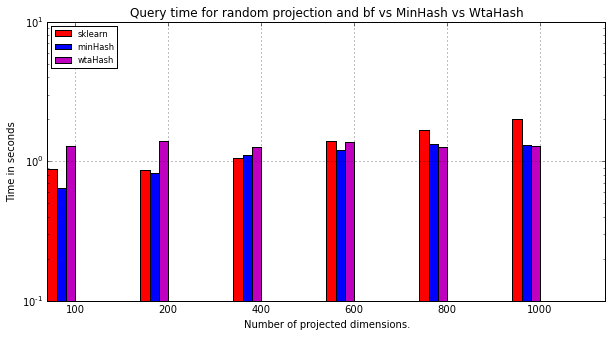

In [18]:
plotData(data=random_projection[:3], color=["r", "b", "m"], label=["sklearn", "minHash", "wtaHash"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Query time for random projection and bf vs MinHash vs WtaHash')

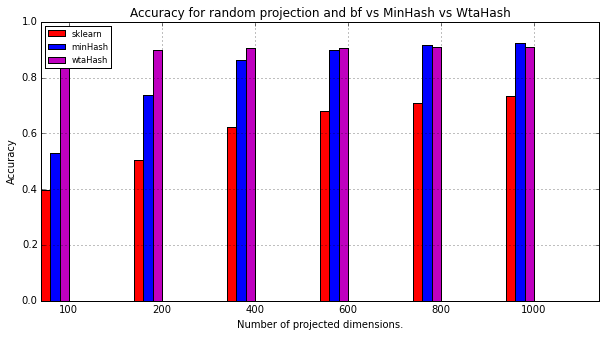

In [19]:
plotData(data=random_projection[3:], color=["r", "b", "m"], label=["sklearn", "minHash", "wtaHash"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Accuracy", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Accuracy for random projection and bf vs MinHash vs WtaHash', log=False)

In [1]:
from eden.converter.rna.rnafold import rnafold_to_eden
from eden.converter.fasta import fasta_to_sequence
from eden.graph import Vectorizer
from itertools import islice
import numpy as np
from scipy.sparse import vstack
%matplotlib inline
%load_ext memory_profiler
from bioinf_learn.util import measure_performance
from bioinf_learn.util import plotData

import time
import numpy as np

def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

def rfam_to_matrix(rfam_id, n_max=50, complexity=2, nbits=10):
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    seqs = islice(seqs,n_max)
    seqs = list(seqs)
    graphs = rnafold_to_eden(seqs)
    vectorizer = Vectorizer(complexity=complexity, nbits=nbits, positional=True)
    X = vectorizer.transform(graphs)
    return X

def rfam_data(rfam_ids, n_max=300, complexity=3, nbits=13):
    Xs = []
    targets = []
    for i,rfam_id in enumerate(rfam_ids):
        X=rfam_to_matrix(rfam_id, n_max=n_max, complexity=complexity, nbits=nbits)
        Xs.append(X)
        targets += [i] * X.shape[0]
    data_matrix = vstack(Xs, format="csr")
    targets = np.array(targets)    
    return data_matrix, targets

In [2]:
rfam_ids=['RF00004','RF00005','RF00015','RF00020','RF00026','RF00169',
          'RF00380','RF00386','RF01051','RF01055','RF01234','RF01699',
          'RF01701','RF01705','RF01731','RF01734','RF01745','RF01750',
          'RF01942','RF01998','RF02005','RF02012','RF02034']

In [3]:
%%time
X, y = rfam_data(rfam_ids, n_max=100, complexity=3, nbits=16)
print 'Instances: %d Features: %d with an avg of %d features per instance' % (X.shape[0], X.shape[1],  X.getnnz()/X.shape[0])
print "Sparsity: ", X.nnz / float(X.shape[0]) / X.shape[1]

Instances: 2300 Features: 65537 with an avg of 3676 features per instance
Sparsity:  0.0560959059967
CPU times: user 1min 8s, sys: 10.3 s, total: 1min 18s
Wall time: 1min 45s


In [9]:
from bioinf_learn.util import measureRandomProjection
max_bin_size = 51
shingle_size = 2
minimal_blocks_in_common= 1
prune_inverse_index= 0
store_value_with_least_sigificant_bit=1
excess_factor= 11
prune_inverse_index_after_instance= 0.0
remove_hash_function_with_less_entries_as= 0
shingle= 1
block_size= 4
hash_functions = 828
minHash = [max_bin_size, shingle_size, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_functions]
max_bin_size = 30
shingle_size = 3
minimal_blocks_in_common= 1
prune_inverse_index= 1
store_value_with_least_sigificant_bit=2
excess_factor= 14
prune_inverse_index_after_instance= 0.5
remove_hash_function_with_less_entries_as= 0
shingle= 0
block_size=1
rangeK_wta = 23
hash_functions = 739
wtaHash = [max_bin_size, shingle_size, rangeK_wta, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_functions]

In [10]:
random_projection_rna = measureRandomProjection(X, minHash, wtaHash )

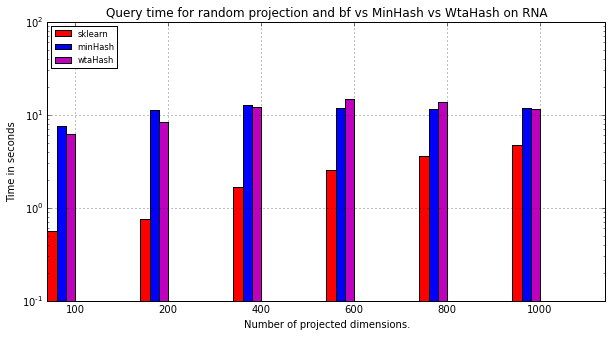

In [11]:
plotData(data=random_projection_rna[:3], color=["r", "b", "m"], label=["sklearn", "minHash", "wtaHash"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Query time for random projection and bf vs MinHash vs WtaHash on RNA')

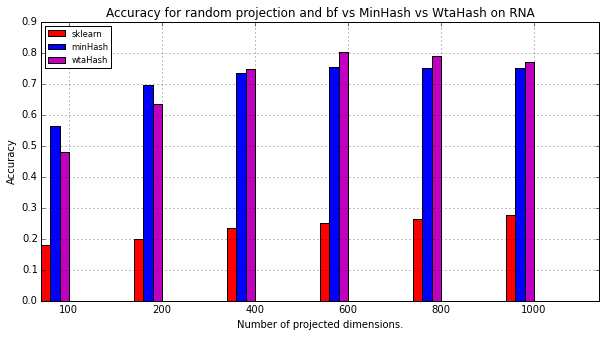

In [12]:
plotData(data=random_projection_rna[3:], color=["r", "b", "m"], label=["sklearn", "minHash", "wtaHash"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Accuracy", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Accuracy for random projection and bf vs MinHash vs WtaHash on RNA', log=False)